# Lecture 3b - Color

<br>

<b>In order to represent color, each pixel in an image, is required to have three values</b><br><br>

<b>However, there are many different ways in which three values can represent color</b><br><br>

<b>We will review some popular methods and how the correct application of a model can lower the complexity of an image analysis task</b><br><br>

<br><br><br><br>

## RGB Color Model

<br>

<b>The best-known format is RGB which encodes the color as three channels (red, green, and blue)</b><br><br>

<b>The Channel operator allows the user the ability to manipulate individual channels of a color image</b><br><br>

<b>There are several ways that it can be used</b><br><br>

<b>For example, a single pixel can be set by representing the three color values (such as RGB) inside curly braces</b><br><br>

<b>Another application is to multiply each channel by individual values</b><br><br>

<b>For example, if the task is to multiply the red, green, and blue channels by the scalars r, g, and b, respectively, then the operation is written as</b><br><br>

${\bf b}[\vec x] = \begin{Bmatrix} r \\ g \\ b \end{Bmatrix} {\bf a}[\vec x]$<br>

<b>The symbol $\varnothing$ is used to block a channel, and so the notation for isolating the red channel is</b><br><br>

${\bf r}[\vec x] = \begin{Bmatrix}1 \\ \varnothing \\ \varnothing \end{Bmatrix} {\bf a}[\vec x]$<br>

<b>The following code represents a channel operator example.  First is the image operator notation</b><br><br>

${\bf a}[\vec x] = Y({\tt 'data/bird.jpg'})$<br><br>

${\bf b}[\vec x] = \sum_{\mathcal{L}}
\begin{Bmatrix} \varnothing \\ 0.5 \\ 0.5 \end{Bmatrix}
{\bf a}[\vec x]$<br><br>

${\bf c}[\vec x] = \Gamma_{>140} \mathcal{L}_L {\bf a}[\vec x]$<br><br>

<br><br>

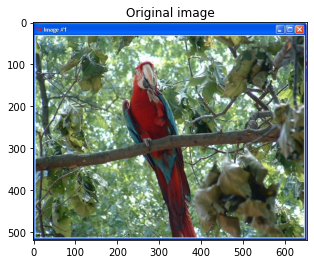

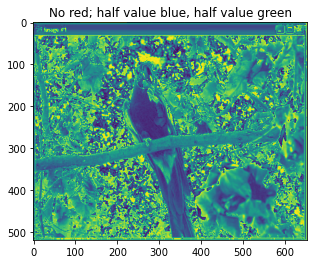

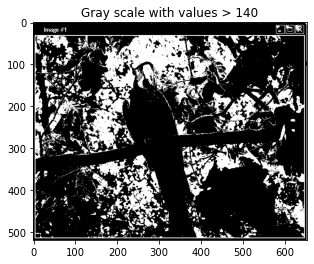

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import scipy.ndimage as nd
import numpy as np

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'

adata = imageio.imread(url)
bdata = (adata[:,:,1] + adata[:,:,2])/2
cdata = imageio.imread(url, as_gray=True) > 140

plt.title('Original image')
plt.imshow(adata)
plt.show()

plt.title('No red; half value blue, half value green')
plt.imshow(bdata)
plt.show()

plt.title('Gray scale with values > 140')
plt.imshow(cdata, cmap='gray')
plt.show()

<br><br><br><br>

## HSV Color Model

<br>

<b>While RGB is an easy method of representing color, it is not a useful format for the purposes of analysis and recognition</b><br><br>

<b>In the RGB format, the intensity of a pixel is mixed in with its hue, and this creates a difficulty in many analysis techniques</b><br><br>

<b>There are several other formats, which separate the intensity from the hue that tends to work better</b><br><br>

<br><br>

<b>The first model considered is HSV</b><br><br>

<b>The HSV color model represents data in three channels known as hue, saturation, and value</b><br><br>

<b>The H channel represents the hue, which is the ratio of the two largest values from the three RGB values for each pixel</b><br><br>

<b>The S represents the saturation which is a measure of the color brilliance which is the ratio of the difference between the smallest of the RGB values to the largest value</b><br><br>

<b>The V channel represents the intensity information</b><br><br>

<b>The following displays a polar map in which red is at $\theta = 0$</b><br><br>

<b>If a pixel had G = B = 0, then the hue would be purely red or $\theta = 0$</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lecture5/im1.png?raw=true" width="300"/img></div>
<br><br>

<b>If the two largest values are R and G, then the angle would be between $0^\circ$ and $120^\circ$</b><br><br>

<b>colorsys provides a few functions to convert from one color model to another</b><br><br>

<b>The function rgb to hsv converts RGB values to its HSV values</b><br><br>

<b>Likewise, the hsv to rgb function converts HSV values to RGB values</b><br><br>

### A few examples to demonstrate this color scheme

<br><br>

<ipython-input-3-db5948e9671d>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  adata = imageio.imread(url)


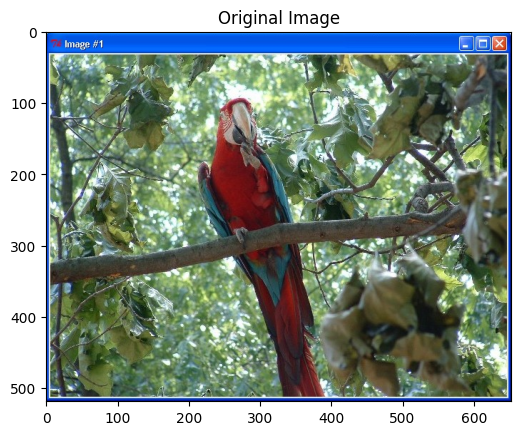

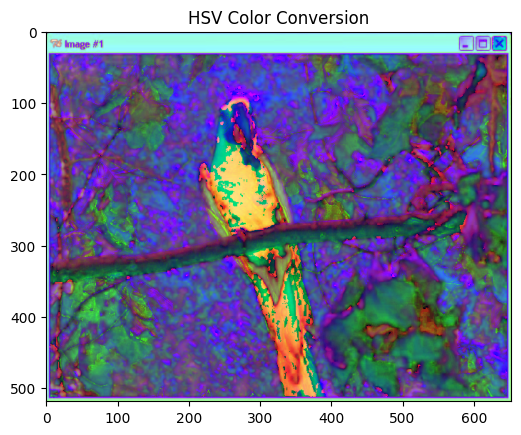

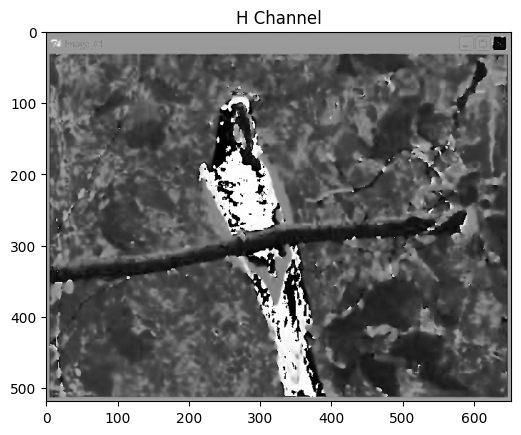

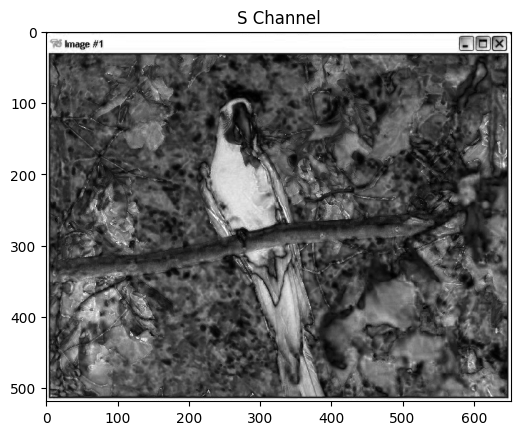

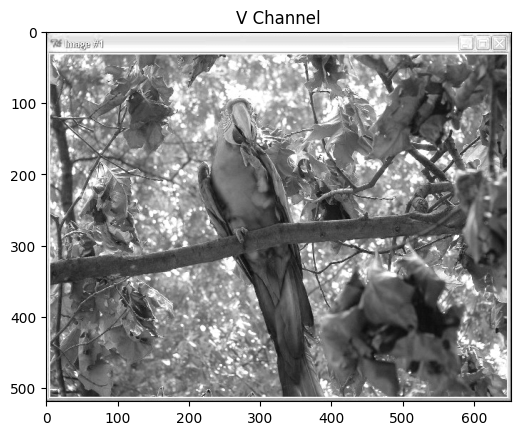


Convert a pure, bright red pixel to its HSV values: (0.0, 1.0, 255)

Same operation on a very dim red pixel,and as seen, the H and S values are the same: (0.0, 1.0, 1)

Convert a green pixel: (0.3333333333333333, 1.0, 255)

Convert a blue pixel: (0.6666666666666666, 1.0, 255)

H value of 1 is the same as an H value of 0: (255, 0.0, 0.0)


In [3]:
import cv2
import colorsys
import imageio
import matplotlib.pyplot as plt
from skimage import color

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
adata = imageio.imread(url)

plt.title('Original Image')
plt.imshow(adata)
plt.show()

adata = color.rgb2hsv(adata)
plt.title('HSV Color Conversion')
plt.imshow(adata)
plt.show()

h, s, v = cv2.split(adata)

plt.title('H Channel')
plt.imshow(h, cmap='gray')
plt.show()

plt.title('S Channel')
plt.imshow(s, cmap='gray')
plt.show()

plt.title('V Channel')
plt.imshow(v, cmap='gray')
plt.show()

print('\nConvert a pure, bright red pixel to its HSV values:', colorsys.rgb_to_hsv(255,0,0))

print('\nSame operation on a very dim red pixel,and as seen, the H and S values are the same:', colorsys.rgb_to_hsv(1,0,0))

print('\nConvert a green pixel:', colorsys.rgb_to_hsv(0,255,0))

print('\nConvert a blue pixel:', colorsys.rgb_to_hsv(0,0,255))

print('\nH value of 1 is the same as an H value of 0:', colorsys.hsv_to_rgb(1,1,255))

<br><br><br><br>

<b>These functions convert the values of a single pixel, but quite often this conversion needs to be applied to the entire image</b><br><br>

<b>The $\mathcal{L}_m$ operator converts an image from one color model to the $m$ model</b><br><br>

<b>So, for this conversion the notation is</b><br><br>

${\bf b}[\vec x] = \mathcal{L}_{HSV} {\bf a}[\vec x]$<br>

<b>Consider an example in which the task is to modify the image by replacing all of the H channel pixels with the square of their original values. The protocol is</b><br><br>

1. Convert the RGB image to HSV
2. Compute the squares in the H channel
3. Create a new image using these new H values along with the original S and V values
4. Convert this image back to RGB for viewing

<b>Given the original RGB image, ${\bf a}[\vec x]$, the Color transformation operator\index{color transformation operator} to HSV notion is</b><br><br>

${\bf b}[\vec x] = \mathcal{L}_{HSV} {\bf a}[\vec x]$<br>

<b>and the modifications of the channels is expressed as</b><br><br>

${\bf c}[\vec x] = \begin{Bmatrix}  \varnothing \\ 1 \\ 1 \end{Bmatrix} {\bf b}[\vec x] + \left( \begin{Bmatrix} 1 \\\varnothing \\ \varnothing \end{Bmatrix}  {\bf b}[\vec x] \right)^2$<br>

<b>where the first term passes the S and V channels without alteration and the second term squares only the H values</b><br><br>

The image ${\bf c}[\vec x]$ is still in the HSV format and so the final step is convert it back to RGB space</b><br><br>

${\bf d}[\vec x] = \mathcal{L}_{RGB} {\bf c}[\vec x]$<br>

<b>Implemented below...

<br><br>

In [ ]:
import imageio
import numpy as np
import colorsys
import cv2

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
rgb = imageio.imread(url)

print('\nOriginal Image')
plt.imshow(rgb)
plt.show()

rgb2 = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(rgb2)
h = h * h  # enhance the hue
rgb2 = cv2.merge((h, s, v))

print('\nHue Enhanced Image')
plt.imshow(rgb2)
plt.show()

rgb2 = cv2.cvtColor(rgb2, cv2.COLOR_HSV2RGB)
print('\nRGB of Hue Enhanced Image')
plt.imshow(rgb2)
plt.show()


<br><br>

<b>The HSV format does well for some applications as long as the pixels are colorful</b><br><br>

<b>This format, however, does have problems with an image with gray pixels</b><br><br>

<br><br><br><br>

### YUV Family

<br>

<b>The YUV family of color models has several similar variants, and for many applications, the selection of which variant to use offers very little advantage</b><br><br>

<b>The conversion to the YUV representation is a linear transformation, which for a single pixel is described by</b><br><br>

$\left[\begin{array}{c}\mathrm{Y} \\ \mathrm{U} \\ \mathrm{V}\end{array}\right]=\left[\begin{array}{ccc}0.299 & 0.587 & 0.114 \\ -0.147 & -0.289 & 0.436 \\ 0.615 & -0.515 & -0.100\end{array}\right]\left[\begin{array}{l}\mathrm{R} \\ \mathrm{G} \\ \mathrm{B}\end{array}\right]$

<b>Each of the channels is a weighted linear combination of the original RGB values</b><br><br>

<br><br>

<b>The YIQ color model is similar except that some of the matrix values are slightly different</b><br><br>

$\left[\begin{array}{l}\mathrm{Y} \\ \mathrm{I} \\ \mathrm{Q}\end{array}\right]=\left[\begin{array}{ccc}0.299 & 0.587 & 0.114 \\ 0.596 & -0.275 & -0.321 \\ 0.212 & -0.528 & 0.311\end{array}\right]\left[\begin{array}{l}\mathrm{R} \\ \mathrm{G} \\ \mathrm{B}\end{array}\right]$

<b>YIQ is the only conversion from this family that is provided in the colorsys module</b><br><br>

<b>The Python script is similar to the RGB to HSV conversion and is shown below</b><br><br>

<b>The Y channel is the intensity</b><br><br>

<b>The I and Q channels are associated with hue</b><br><br>

<b>A similar transformation is YCbCr, and it has similar matrix values but also adds a bias</b><br><br>

$\left[\begin{array}{c}\mathrm{Y} \\ \mathrm{Cb} \\ \mathrm{Cr}\end{array}\right]=\left[\begin{array}{ccc}0.2573 & 0.5013 & 0.0969 \\ -0.147 & -0.2907 & 0.4378 \\ 0.4378 & -0.3676 & -0.0712\end{array}\right]\left[\begin{array}{c}\mathrm{R} \\ \mathrm{G} \\ \mathrm{B}\end{array}\right]+\left[\begin{array}{c}16 \\ 128 \\ 128\end{array}\right]$

<b>YCbCr example as follows</b><br><br>

<br><br>


Original Image


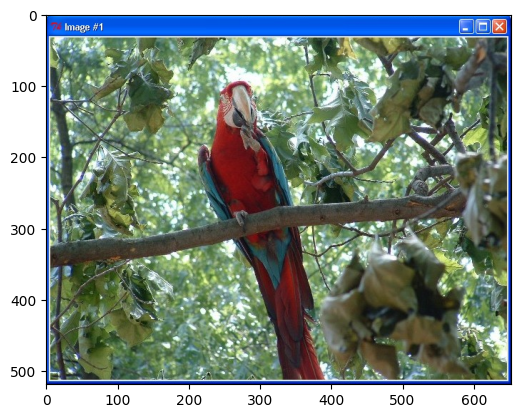

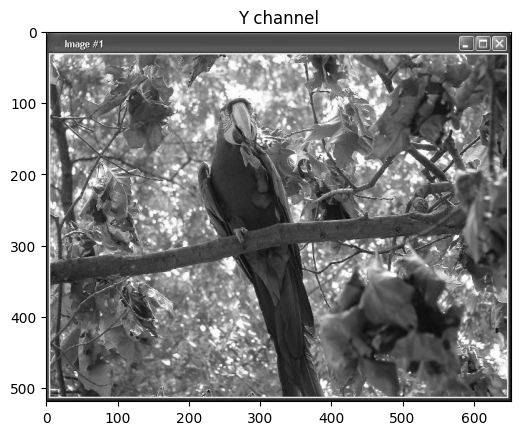

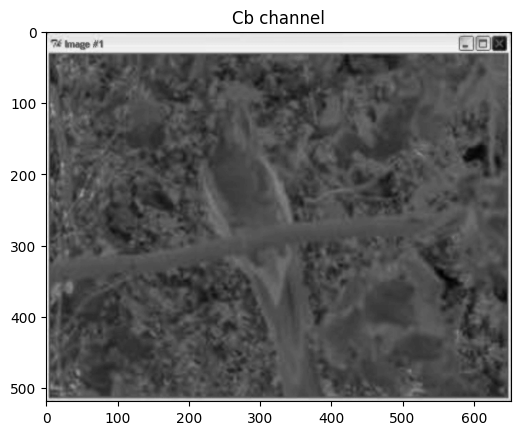

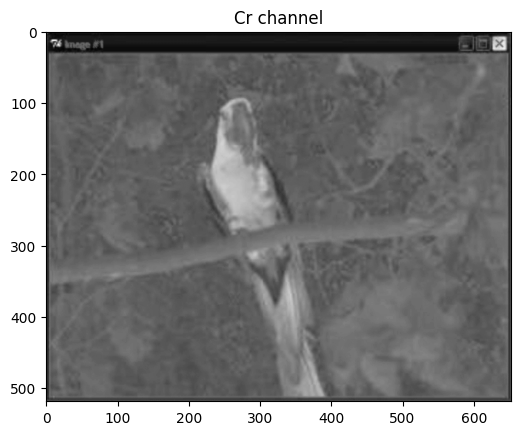

In [ ]:
#  YCbCr color conversion
%matplotlib inline
import numpy as np
#import colorsys
from PIL import Image
import urllib
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
rgb = Image.open(urllib.request.urlopen(url))

print('\nOriginal Image')
plt.imshow(rgb)
plt.show()

ycbcr = rgb.convert('YCbCr')
y,cb,cr = ycbcr.split()

plt.title('Y channel')
plt.imshow(np.asarray(y), cmap='gray')
plt.show()

plt.title('Cb channel')
plt.imshow(np.asarray(cb), cmap='gray')
plt.show()

plt.title('Cr channel')
plt.imshow(np.asarray(cr), cmap='gray')
plt.show()

<br><br><br><br>

### CIE L*A*B*

<br>

<b>The final conversion model to be reviewed here is CIE L*a*b*, which was designed to emulate human perception as it is based on human responses of different color frequencies</b><br><br>

<b>It is an involved conversion and only the protocol is reviewed here</b><br><br>

<b>To compute the L*a*b* values, the RGB values are first converted to XYZ space through a linear conversion</b><br><br>

<b>This is performed through three functions</b><br><br>

<b>The first receives the RGB values and computes the linear transformation to XYZ space similar to RGB2YCbCr</b><br><br>

<b>The XYZ2LAB function performs the second conversion</b><br><br>

<b>The intensity is displayed in one channel (the L channel), and the hue is represented in two other channels</b><br><br>

<br><br>

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import colorsys
from PIL import Image
import urllib

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
rgb = Image.open(urllib.request.urlopen(url))

print('\nOriginal Image')
plt.imshow(rgb)
plt.show()

lab = color.rgb2lab(rgb)
l, a, b = cv2.split(lab)

plt.title('L channel')
plt.imshow(np.asarray(l), cmap='gray')
plt.show()

plt.title('A channel')
plt.imshow(np.asarray(a), cmap='gray')
plt.show()

plt.title('B channel')
plt.imshow(np.asarray(b), cmap='gray')
plt.show()

<br><br><br><br>

## Improvement in Recognition

<br>

<b>For example, consider the case of isolating the boy’s coat</b><br><br>

<b>In the RGB model, this would be somewhat difficult since the coat values have large ranges in the each of the three-color channels</b><br><br>

<b>In the YIQ model, the pixels on the coat have a small range of intensities, and thus, isolation by threshold would capture the coat and reject most of the other pixels</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lecture5/im2.png?raw=true" width="200"/img></div>
<br><br>

<br><br>

#### There is no magical transformation

<b>The task of isolating the boy’s coat from the rest of the image can be accomplished by the following protocol</b><br><br>

1. Select the correct color model and convert the image
2. Manually select a region of interest (ROI)
3. Collect statistics over the ROI
4. Decide on threshold values
5. Apply the thresholds
6. Display the result

<b>Step 1</b> is to determine the best color model and to convert the image to that model</b><br><br>

<b>After visually examining the results from RGB, HSV, and YIQ the best model to use would be YIQ</b><br><br>

<b>The main criteria was that the coat needed to be presented with a small range of pixel values that are unique to other regions of the image</b><br><br>

<b>Given the original RGB image ${\bf a}[\vec x]$ the conversion is</b><br><br>

${\bf b}[\vec x] = \mathcal{L}_{YIQ} {\bf a}[\vec x]$

<br><br>

<b>Step 2</b> is to determine the on-target ROI (region of interest)</b><br><br>

<b>This is a region that contains only pixels from the coat that will then be used for the next step</b><br><br>

<b>In this case it is easy to use a rectangular region which makes the capture of this region easy</b><br><br>

<b>The Window operator represents the isolation of the ROI</b><br><br>

<b>Since it is rectangular the ROI is defined by opposing corners $\vec v_1$ and $\vec v_2$ where $v_1 \in {\bf X}$ and $v_2 \in {\bf X}$</b><br><br>

<b>To keep the notation clean the shorthand notation is employed</b><br><br>

$\Box_1 \equiv \Box_{\vec v_1, \vec v_2}$

<br><br>

<b>Step 3</b> applies this operator over a region and collects information such as the maximum value</b><br><br>

<b>This is applied to both the I and Q channels with the application to the I channel described as</b><br><br>

${\bf c}[\vec x] = \begin{Bmatrix} \varnothing \\ 1 \\ \varnothing \end{Bmatrix} {\bf b}[\vec x]$

$m_1 = \bigvee \Box_1 {\bf c}[\vec x]$

<b>where $\bigvee$ is the Max operator.  The minimum value is likewise obtained by</b><br><br>

$n_1 = \bigwedge \Box_1 {\bf c}[\vec x]$

<b>The average and standard deviation over this region is determined by</b><br><br>

$\mu_1 = \mathcal{M} {\bf c}[\vec x]$

and

$\sigma_1 = \mathcal{T} {\bf c}[\vec x]$

<b>In this example, the threshold values chosen were $\mu_1 \pm \sigma_1$</b><br><br>

<br><br>

<b>Step 4</b>A similar process is followed for the Cr channel which repeats the above equations to determine $m_2$, $n_2$, $\mu_2$ and $\sigma_2$</b><br><br>

<b>Again the same criteria of $\mu_2 \pm \sigma_2$ is applied to determine the threshold values completing <b>step 4</b><br><br>

<br><br>

<b>Step 5</b> applies these thresholds and in this case</b><br><br>

${\bf d}[\vec x] = \left( 165.6< \begin{Bmatrix} \varnothing \\ 1 \\ \varnothing \end{Bmatrix} {\bf b}[\vec x] < 185.4 \right) \times \left( 78.7< \begin{Bmatrix} \varnothing \\ \varnothing \\ 1 \end{Bmatrix} {\bf b}[\vec x] < 98.5 \right)$

<b>The output ${\bf d}[\vec x]$ is a binary-valued image and the goal is that the only pixels that are set to 1 are on-target</b><br><br>

<br><br><br><br>

# Homework 3b

<br>

<b>For these problems use a color image that has regions with brilliant reds, greens, and blues. In the following problems this is called the test image.<br><br>

1. Split the test image into its three R, G, B components and display each component as a gray scale image.<br><br>

2. Load the test image, exchange the RGB components such that the green information is now in the red channel, the blue information is now in the green channel and the red information is now in the blue channel.  Display this color image. <br><br>

3.  Save the image created in #2 to a file.<br><br>

4. Convert the test image to the HSV components and display each channel as a gray scale image.<br><br>

5. Convert the test image to YIQ and display each channel as a gray scale image.</b>
